# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


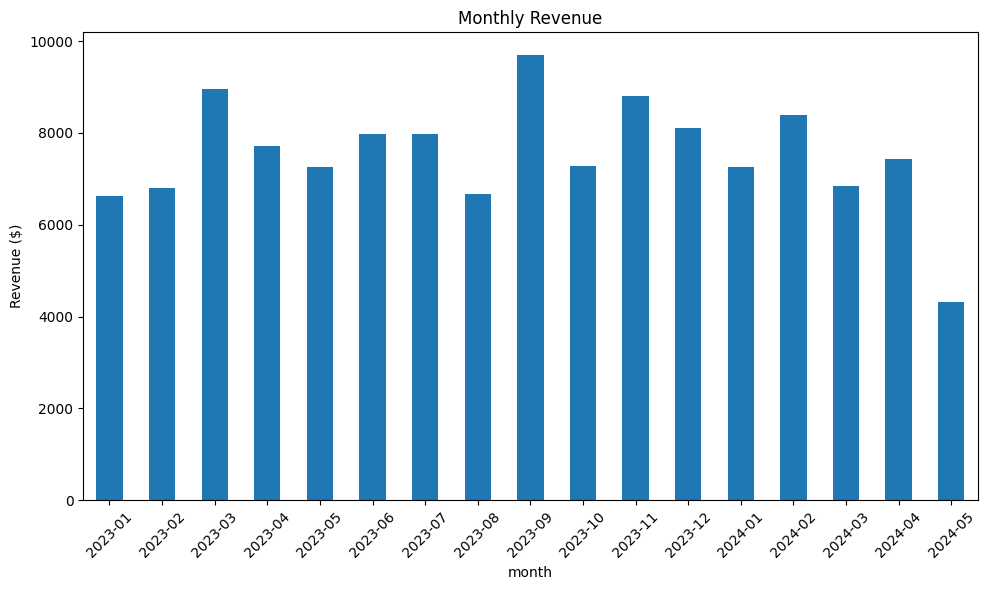

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [14]:
# Your code here
latest_date = data['month'].max()
first_month_of_latest_quarter = latest_date - 2
print(first_month_of_latest_quarter)
data_latest_quarter = data[(data['month'] >= first_month_of_latest_quarter) & (data['month'] <= latest_date)]
last_quarter_revenue = data_latest_quarter['revenue'].sum().round(2)
print("The revenue for the most recent quarter is: $", last_quarter_revenue)
last_quarter_months = data_latest_quarter.groupby('month')['revenue'].sum().sort_index()
print("The monthly revenue breakdown for the most recent quarter is:\n", last_quarter_months)

2024-03
The revenue for the most recent quarter is: $ 18580.73
The monthly revenue breakdown for the most recent quarter is:
 month
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [15]:

# Your code here
data_customer_revenue = data.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(5)
print(data_customer_revenue)

print(data_customer_revenue.sum()/data['revenue'].sum()*100)
print("The top 5 customers contribute approximately 13% of the total revenue.")

customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64
12.852258381355428
The top 5 customers contribute approximately 13% of the total revenue.


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [18]:
# Your code here
data_segments_spending = data.groupby('customer_segment')['revenue'].mean().sort_values(ascending=False)
print(data_segments_spending)
print("In terms of average spending per order from greatest to least: Senior > Professional > Student")

customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64
In terms of average spending per order from greatest to least: Senior > Professional > Student


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [19]:

# Your code here
data_region_revenue = data.groupby('region')['revenue'].sum().sort_values(ascending=False)
print(data_region_revenue)
print("The South region generated the highest revenue")
data_region_average_order_size = data.groupby('region')['quantity'].mean().sort_values(ascending=False)
print(data_region_average_order_size)
print("The West region had the highest average order size")

region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64
The South region generated the highest revenue
region
West     2.627273
East     2.469231
South    2.440945
North    2.360902
Name: quantity, dtype: float64
The West region had the highest average order size


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [ ]:
# Your code here
data_product_quantity = data.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
print(data_product_quantity)
data_product_revenue = data.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
print(data_product_revenue)
print(" home products stand at the top")

product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64
In terms of both total quantity and total revenue, home products stand at the top


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [21]:
# Your code here
data_discounted = data[data['discount_applied'] != 0]
data_not_discounted = data[data['discount_applied'] == 0]
average_revenue_discounted = data_discounted['revenue'].mean().round(2)
average_revenue_not_discounted = data_not_discounted['revenue'].mean().round(2)
print("Average revenue for orders with discount applied: $", average_revenue_discounted)
print("Average revenue for orders without discount applied: $", average_revenue_not_discounted)
print("Discounted orders generate higher average revenue per order compared to non-discounted orders.")

Average revenue for orders with discount applied: $ 263.83
Average revenue for orders without discount applied: $ 248.3
Discounted orders generate higher average revenue per order compared to non-discounted orders.


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [ ]:
# Your code here
data_payment_method = data.groupby('payment_method').size().sort_values(ascending=False)
print(data_payment_method/data_payment_method.sum()*100)
print("27.4% for Credit Card, 24.8% for Gift Card, 24.6% for PayPal, and 23.2% for Debit Card")
data_payment_method_revenue = data.groupby('payment_method')['revenue'].mean().sort_values(ascending=False)
print(data_payment_method_revenue)
print("Yes,")

payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
dtype: float64
27.4% for Credit Card, 24.8% for Gift Card, 24.6% for PayPal, and 23.2% for Debit Card
payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64
Yes, purchases with a debit card have a higher average revenue per order compared to other payment methods.


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

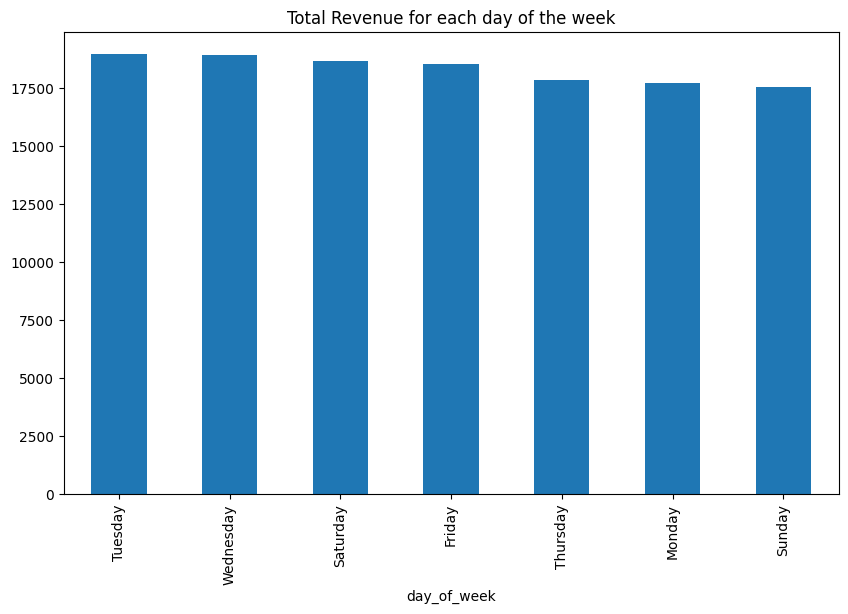

In [23]:
# Your code here
data_day_revenue = data.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)
data_day_revenue.plot(kind='bar', figsize=(10,6), title='Total Revenue for each day of the week')
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

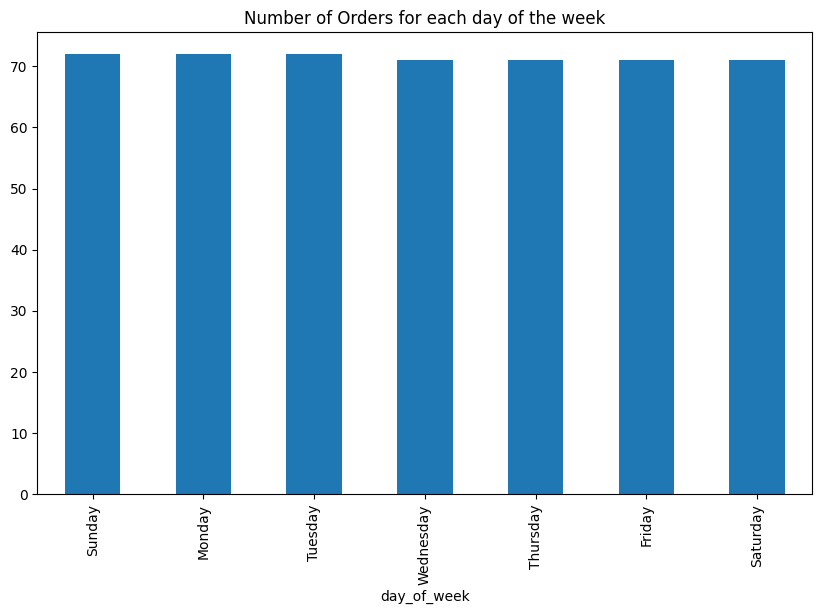

In [24]:
# Your code here
data_day_activity = data['day_of_week'].value_counts().sort_values(ascending=False)
data_day_activity.plot(kind='bar', figsize=(10,6), title='Number of Orders for each day of the week')
plt.show() 

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

In [ ]:
print("Revenue levels appear fairly consistent between weekdays and weekends.")
print("Interestingly, when looking at order counts, Sunday has the highest activity while Saturday has the lowest.")


In terms of revenue weekends don't really seem to be busier than weekday
Weirdly enough in terms of number of orders, Sunday is the busiest while Saturday is the least busy


**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

It is evident that Professionals and Students should be prioritized, as they represent strong revenue potential. A targeted strategy would be to offer discounts to these segments during weekends — particularly on Saturdays, which show the lowest order volume, and Sundays, which contribute the least revenue. Since our analysis shows that discounts can drive higher spending, this approach could help boost weekend performance.

Additionally, discounts could be region-specific, with a focus on the West region, as it lags behind in total revenue.

From a product perspective, the company should promote Sports and Books more aggressively, while reducing emphasis on Home products. Home goods tend to sell consistently without much promotion, whereas Books and Sports items are discretionary purchases that benefit more from incentives and targeted marketing.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.